<a href="https://colab.research.google.com/github/Badal3000/Badal3000/blob/main/timeseriesforecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_series(time, series, format="_", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("time")
    plt.ylabel("value")
    if label:
      plt.legend(fontsize = 14)

    plt.grid(True)

In [ ]:
def trend(time , slope = 0):
  return time* slope

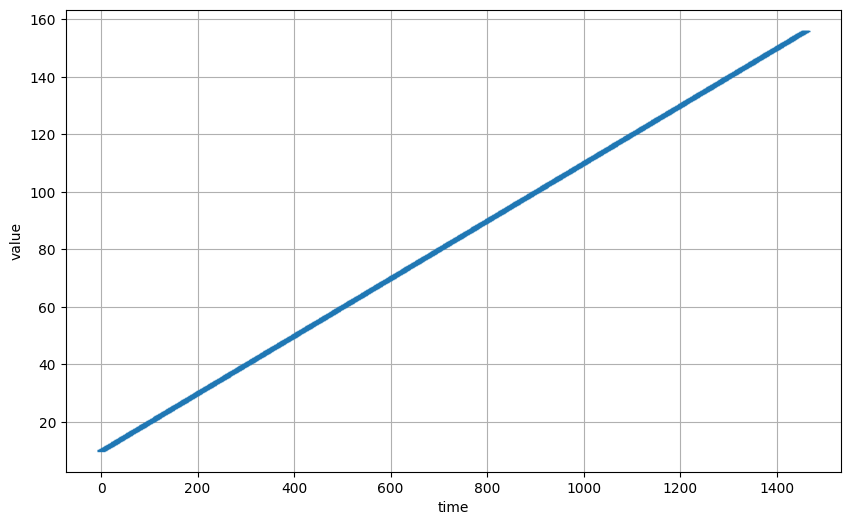

In [ ]:
time = np.arange(4 *365 +1)
baseline = 10
series = baseline + trend(time , 0.1)

plt.figure(figsize=(10 ,6))
plot_series(time, series)
plt.show()

In [ ]:
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [ ]:
series


array([ 10. ,  10.1,  10.2, ..., 155.8, 155.9, 156. ])

generate a seasonal pattern

In [ ]:
def seasonal_pattern(season_time):
  return np.where(season_time<0.4,
                  np.cos(season_time *2 *np.pi),
                  1/np.exp(3*season_time))

def seasonality(time , period, amplitude = 1, phase = 0):
  season_time=((time + phase)%period)/period
  return amplitude*seasonal_pattern(season_time)

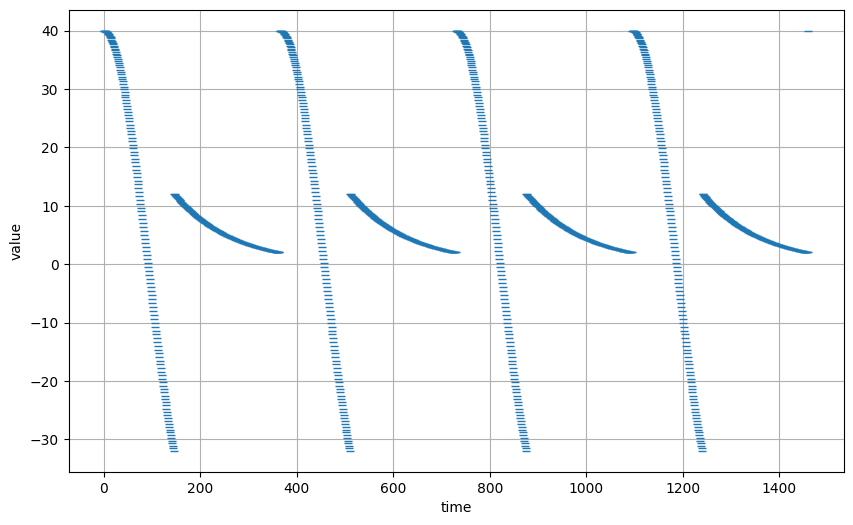

In [ ]:
amplitude = 40
series = seasonality(time, period  = 365, amplitude = amplitude, )

plt.figure(figsize = (10, 6))
plot_series(time, series)
plt.show()

time series forecasting for trend and seasonality


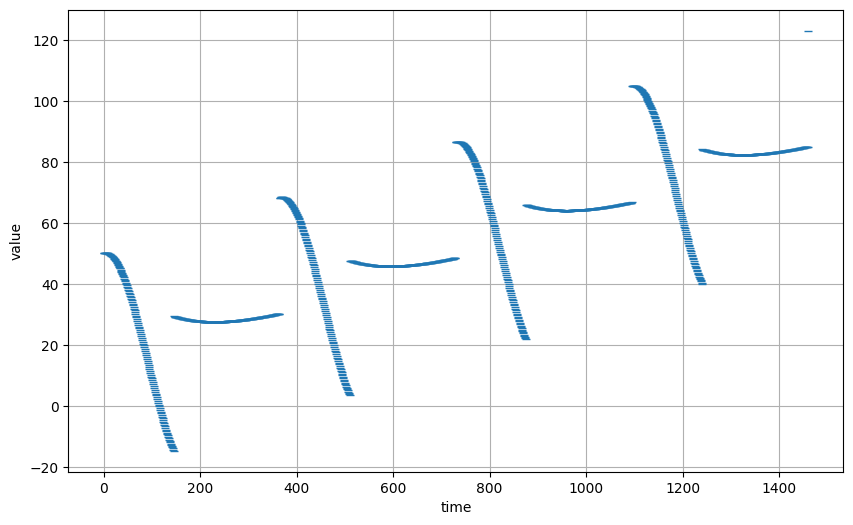

In [ ]:
slope = 0.05
series = baseline + trend(time,slope) + seasonality(time, period = 365, amplitude=amplitude)

plt.figure(figsize = (10,6))
plot_series(time, series)
plt.show()

time series forecasting for white noise

In [ ]:
def white_noise(time, noise_level = 1, seed = None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time))*noise_level

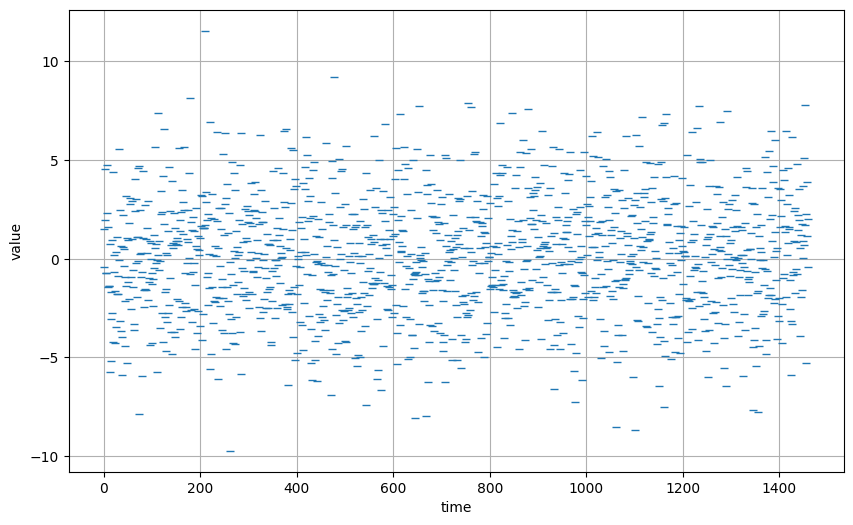

In [ ]:
noise_level = 3
noise = white_noise(time, noise_level, seed = 42)

plt.figure(figsize=(10,6))
plot_series(time, noise)
plt.show()

add noise to time series forecasting as noise+series


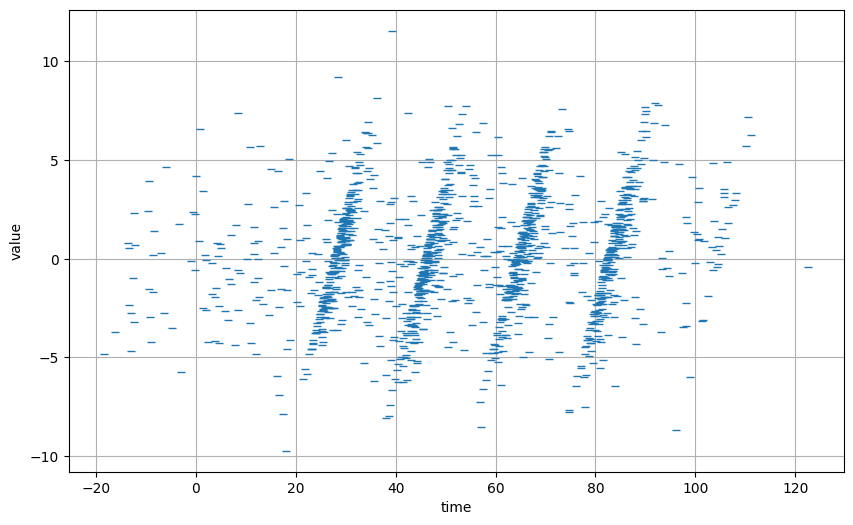

In [ ]:
series+=noise

plt.figure(figsize=(10,6))
plot_series(series, noise)
plt.show()